<a href="https://colab.research.google.com/github/C-Fer/Data-Analytics-Using-IA/blob/main/ParcialFinal_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PARCIAL FINAL** 
# Inteligencia Artificial
## Universidad Tecnológica de Bolívar
## Facultad de Ingeniería
## Grupo G - NRC 1084


### **Integrantes:**

    Camilo Andrés Fernández Echavez    T00054759
    Edgar David Hernández Medina       T00054326
    René Arturo De Oro Larios          T00054355
  

## Importación de librerias necesarias

In [ ]:
#Gestión de datos
import os
import pandas as pd
import numpy as np
%matplotlib inline
import datetime

#Gráficas
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from IPython.display import Image
import missingno as msno
import seaborn as sns

#Librerias para la creación de la red neuronal
import tensorflow as tf
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from numpy import  argmax


## Lectura de datos

In [ ]:
# Lectura del archivo CSV filtrado
DataFrame = pd.read_csv("clean_data.csv")
DataFrame.head()

,Unnamed: 0,Edad,RSSS,Cefalea,Edemas,ECVICT,DM1DM2,ICC,Licorc8-15Dias,Quirurgicos,Peso,Talla,IMC,SMC,SignosVitales,FC,FR,Pulso,Tension_arterial,PMI,RsCsRs,DietaBajaSal,Prevención_cancer_prostata,Abuso sexual,Violencia intrafamiliar,"Autoestima, autocuidado",3_intervenciones_sobre_factore_riesgo_específico,Riesgo_edad,Antecedentes_familiares,Perimetro_abdominal,Riesgo_perimetro,Tabaquismo,Total_Riegos(F_de_R),Nefropatia_diabetica,LOB,EKG,Ecocardiografia,Ateroesclerosis,Ecografia_carotida,Disfuncion_renal,Condiciones_clinicas_asociadas,Diabetes_mellitus_diagnosticada,Glicemia_ayunas,Diabetes_mellitus_(DM2),ClasificacionFinalRiesgoCardiovascular,CausaExterna,TipoDiagnostico,DiagnosticoPrincipal,Resultado,CodigoDiagnosticoPrincipal
0,1,46,Subsidiado,1,0,0,0,0,0,1,90.0,1.65,33.06,1.97,1.97,80.0,20.0,80.0,11080,0,1,1,True,True,True,True,True,False,False,95.0,True,False,2.0,0,0,False,False,False,False,False,0,False,False,0,3.0,15,2,HIPERTENSION ESENCIAL (PRIMARIA),True,I10X
1,2,68,Subsidiado,1,0,0,1,0,0,0,90.0,1.70,31.14,2.01,2.01,88.0,22.0,88.0,13080,0,1,1,True,True,True,True,True,True,False,112.0,True,False,4.0,0,0,False,False,False,False,False,0,True,False,1,3.0,15,2,HIPERTENSION ESENCIAL (PRIMARIA),True,I10X
2,3,53,No afiliado,1,0,0,0,0,0,1,65.0,1.55,27.06,1.64,1.64,88.0,22.0,88.0,12080,0,1,1,False,True,True,True,True,False,False,88.0,True,False,2.0,0,0,False,False,False,False,False,0,False,False,0,3.0,15,2,HIPERTENSION ESENCIAL (PRIMARIA),True,I10X
3,4,88,Subsidiado,1,1,0,0,0,0,1,52.0,1.52,22.51,1.47,1.47,84.0,22.0,84.0,11080,0,1,1,True,True,True,True,True,True,False,88.0,False,False,2.0,0,0,False,False,False,False,False,0,False,False,0,3.0,15,2,HIPERTENSION ESENCIAL (PRIMARIA),True,I10X
4,5,63,Subsidiado,1,0,0,0,0,0,1,70.0,1.61,27.01,1.74,1.74,84.0,22.0,84.0,13080,0,1,1,True,True,True,True,True,True,True,97.0,False,True,4.0,0,0,False,False,False,False,False,0,False,False,0,3.0,15,2,HIPERTENSION ESENCIAL (PRIMARIA),True,I10X


In [ ]:
DataFrame.shape

(7453, 50)

# **1. Verificamos que no hallan datos faltantes**

## Número de datos faltantes

In [ ]:
for col in DataFrame.columns:
    missing_data = DataFrame[col].isnull().sum()
    print('{}: {}'.format(col, missing_data))

Unnamed: 0: 0
Edad: 0
RSSS: 0
Cefalea: 0
Edemas: 0
ECVICT: 0
DM1DM2: 0
ICC: 0
Licorc8-15Dias: 0
Quirurgicos: 0
Peso: 0
Talla: 0
IMC: 0
SMC: 0
SignosVitales: 0
FC: 0
FR: 0
Pulso: 0
Tension_arterial: 0
PMI: 0
RsCsRs: 0
DietaBajaSal: 0
Prevención_cancer_prostata: 0
Abuso sexual: 0
Violencia intrafamiliar: 0
Autoestima, autocuidado: 0
3_intervenciones_sobre_factore_riesgo_específico: 0
Riesgo_edad: 0
Antecedentes_familiares: 0
Perimetro_abdominal: 0
Riesgo_perimetro: 0
Tabaquismo: 0
Total_Riegos(F_de_R): 0
Nefropatia_diabetica: 0
LOB: 0
EKG: 0
Ecocardiografia: 0
Ateroesclerosis: 0
Ecografia_carotida: 0
Disfuncion_renal: 0
Condiciones_clinicas_asociadas: 0
Diabetes_mellitus_diagnosticada: 0
Glicemia_ayunas: 0
Diabetes_mellitus_(DM2): 0
ClasificacionFinalRiesgoCardiovascular: 0
CausaExterna: 0
TipoDiagnostico: 0
DiagnosticoPrincipal: 0
Resultado: 0
CodigoDiagnosticoPrincipal: 0


## Mapa de calor de datos faltantes

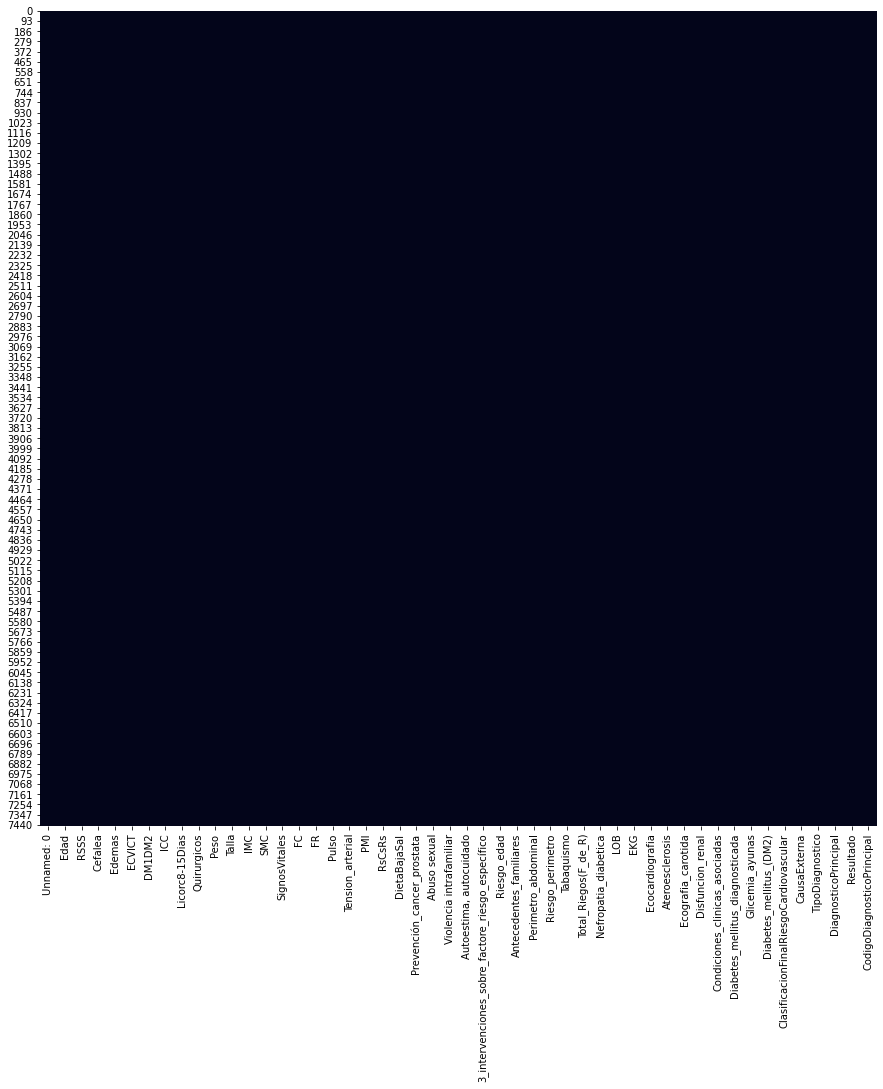

In [ ]:
plt.figure(figsize=(15,15)) 
sns.heatmap(DataFrame.isnull(),cbar=False) # Mapa de calor de seaborn

# **2. Balanceo de los datos** 

## Primero vemos la distribución de datos de la variable objetivo

In [ ]:
DataFrame['CodigoDiagnosticoPrincipal'].value_counts()/DataFrame.shape[0]*100

I10X    89.749094
E119     4.145981
E109     3.166510
E149     1.583255
E785     0.254931
Z000     0.201261
I10I     0.161009
I119     0.147592
E148     0.093922
E108     0.080504
A061     0.053670
I498     0.053670
E121     0.053670
E106     0.040252
A219     0.040252
I059     0.040252
I158     0.026835
G409     0.026835
L681     0.013417
A030     0.013417
I120     0.013417
A078     0.013417
E118     0.013417
E871     0.013417
Name: CodigoDiagnosticoPrincipal, dtype: float64

## Ahora separamos la variable objetivo

In [ ]:
Y = DataFrame[['CodigoDiagnosticoPrincipal']]

## OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse=False)
Y = encoder.fit_transform(Y)

## Seleccionamos las tres clases con más cantidad de datos

In [ ]:
clases = DataFrame.loc[(DataFrame['CodigoDiagnosticoPrincipal']=='I10X') | (DataFrame['CodigoDiagnosticoPrincipal']=='E119') | (DataFrame['CodigoDiagnosticoPrincipal']=='E109')]

## Contamos las muestras por clases

In [ ]:
clases['CodigoDiagnosticoPrincipal'].value_counts()

I10X    6689
E119     309
E109     236
Name: CodigoDiagnosticoPrincipal, dtype: int64

## LabelEncoder

In [ ]:
labelencoder = LabelEncoder()
clases['CodigoDiagnosticoPrincipal']=labelencoder.fit_transform(clases['CodigoDiagnosticoPrincipal'])
clases['DiagnosticoPrincipal']=labelencoder.fit_transform(clases['DiagnosticoPrincipal'])
clases['RSSS']=labelencoder.fit_transform(clases['RSSS'])
clases = clases.replace({True: 1,False:0})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
clases['CodigoDiagnosticoPrincipal'].value_counts()

2    6689
1     309
0     236
Name: CodigoDiagnosticoPrincipal, dtype: int64

## Definimos las variables de caracteristicas y la variable objetivo

In [ ]:
Y = clases[['CodigoDiagnosticoPrincipal']]
X = clases[[x for x in clases if x not in Y]]

## Se normalizan los datos

In [ ]:
X=preprocessing.Normalizer().fit(X).transform(X)

## Dividiendo datos Conjunto de entrenamiento / Conjunto de Pruebas

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(X,Y, test_size=0.2)
print('Conjunto de entrenamiento: ', x_train.shape, y_train.shape)
print('Conjunto de prueba: ', x_test.shape, y_test.shape)

Conjunto de entrenamiento:  (5787, 49) (5787, 1)
Conjunto de prueba:  (1447, 49) (1447, 1)


## Dispersión de las clases

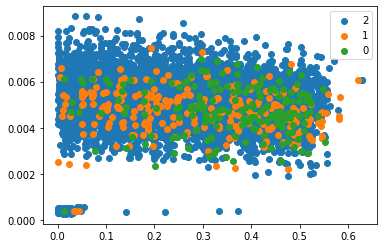

In [ ]:
counter = Counter(y_train.squeeze())
for label, _ in counter.items():
  row_ix = np.where(y_train.squeeze() == label)[0]
  plt.scatter(x_train[row_ix, 0], x_train[row_ix, 1], label=str(label))
plt.legend()
plt.show()

## Balanceo de clases: Oversampling con SMOTE

### Aplicación de la técnica para entrenamiento

In [ ]:
smt = SMOTE()
x_train, y_train = smt.fit_sample (x_train, y_train)
np.bincount(y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


array([5350, 5350, 5350])

### Aplicación de la técnica para prueba

In [ ]:
x_test, y_test = smt.fit_sample (x_test, y_test)
np.bincount(y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


array([1339, 1339, 1339])

### Tamaños finales para prueba y entrenamiento

In [ ]:
print('Conjunto de entrenamiento: ', x_train.shape)
print('Conjunto de prueba: ', x_test.shape)

Conjunto de entrenamiento:  (16050, 49)
Conjunto de prueba:  (4017, 49)


## Dispersión de los datos con SMOTE

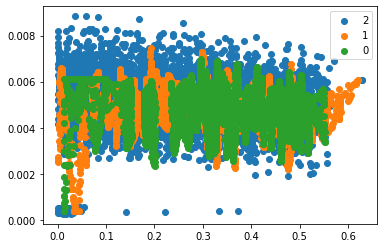

In [ ]:
counter = Counter(y_train)
for label, _ in counter.items():
  row_ix = np.where(y_train == label)[0]
  plt.scatter(x_train[row_ix, 0], x_train[row_ix, 1], label=str(label))
plt.legend()
plt.show() 

## Ahora usamos dummies variables para las clases

In [ ]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

# **3. Red neuronal y parametrización**

## Modelo Red Neuronal

In [ ]:
with tf.device('/GPU:0'):
  model = Sequential()

  model.add(Dense(128,input_dim=49, activation='relu', name='fc1'))
  model.add(Dropout(0.34))
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(3, activation='softmax', name='output'))


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Entrenando la Red Neuronal

In [ ]:
trained_network = model.fit(x_train, y_train, epochs=30, validation_split = 0.1)

Epoch 1/30
452/452 [==============================] - 1s 2ms/step - loss: 0.6340 - accuracy: 0.7132 - val_loss: 0.6728 - val_accuracy: 0.9084
Epoch 2/30
452/452 [==============================] - 1s 2ms/step - loss: 0.6017 - accuracy: 0.7323 - val_loss: 0.5341 - val_accuracy: 0.9838
Epoch 3/30
452/452 [==============================] - 1s 2ms/step - loss: 0.5913 - accuracy: 0.7378 - val_loss: 0.6710 - val_accuracy: 0.8953
Epoch 4/30
452/452 [==============================] - 1s 1ms/step - loss: 0.6082 - accuracy: 0.7326 - val_loss: 0.8608 - val_accuracy: 0.5738
Epoch 5/30
452/452 [==============================] - 1s 2ms/step - loss: 0.6274 - accuracy: 0.7439 - val_loss: 0.5524 - val_accuracy: 0.9221
Epoch 6/30
452/452 [==============================] - 1s 2ms/step - loss: 0.6275 - accuracy: 0.7403 - val_loss: 0.7424 - val_accuracy: 0.7377
Epoch 7/30
452/452 [==============================] - 1s 1ms/step - loss: 0.6023 - accuracy: 0.7570 - val_loss: 0.6392 - val_accuracy: 0.8386
Epoch 

# **4. Análisis de resultados**

## Recuento de resultados

In [ ]:
print('Neural Network Summary: ')
print(model.summary())

Neural Network Summary: 
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 128)               6400      
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 3)                 387       
Total params: 39,811
Trainable params: 39,811
Non-trainable params: 0
_________________________

## Perdida y precisión del modelo (Loss - Accuracy)

In [ ]:
resultados = model.evaluate(x_test, y_test)

print('Perdida de prueba (Loss) : ', round(resultados[0],2)*100,'%')
print('Precisión de prueba (Accuracy): ', round(resultados[1],2)*100,'%')

126/126 [==============================] - 0s 730us/step - loss: 0.2319 - accuracy: 0.9211
Perdida de prueba (Loss) :  23.0 %
Precisión de prueba (Accuracy):  92.0 %


## Curva de aprendizaje del modelo




### Creamos un nuevo DataFrame para poder hacer la curva de aprendizaje

In [ ]:
train = pd.DataFrame(trained_network.history)
train ['epoch'] = trained_network.epoch
train.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
25,0.717761,0.661198,0.850736,0.742056,25
26,0.706672,0.667567,0.901035,0.442991,26
27,0.744004,0.633645,0.766421,0.907788,27
28,0.707072,0.657805,0.845472,0.818692,28
29,0.678605,0.680651,1.025713,0.427414,29


### Ahora creamos la curva de aprendizaje

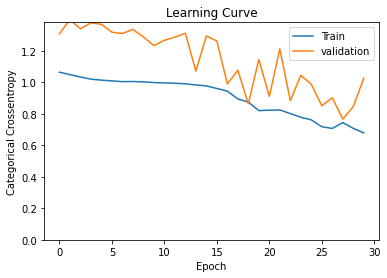

In [ ]:
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Categorical Crossentropy')
plt.plot(train['epoch'], train['loss'],label='Train')
plt.plot(train['epoch'], train['val_loss'],label = 'validation')
plt.ylim([0,1.38])
plt.title('Learning Curve')
plt.legend()
plt.show()

# **Se evalua finalmente el modelo guardado**

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resultados = model.evaluate(x_test, y_test)
print('Perdida de prueba final (Final Test Set Loss) : ', round(resultados[0],2)*100,'%')
print('Precisión de prueba final (Final Test Set Accuracy): ', round(resultados[1],2)*100,'%')

126/126 [==============================] - 1s 823us/step - loss: 0.3463 - accuracy: 0.8433
Perdida de prueba final (Final Test Set Loss) :  23.0 %
Precisión de prueba final (Final Test Set Accuracy):  92.0 %
